In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
class EpsilonGreedyBandit:
    def __init__(self, num_arms, epsilon):
        self.num_arms = num_arms
        self.epsilon = epsilon
        self.q_values = np.zeros(num_arms)
        self.counts = np.zeros(num_arms)
        self.total_counts = 0

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.num_arms)
        else:
            return np.argmax(self.q_values)

    def update(self, action, reward):
        self.counts[action] += 1
        self.total_counts += 1
        alpha = 1 / self.counts[action]
        self.q_values[action] += alpha * (reward - self.q_values[action])

In [36]:
class UCBBandit:
    def __init__(self, num_arms, c):
        self.num_arms = num_arms
        self.c = c
        self.q_values = np.zeros(num_arms)
        self.counts = np.zeros(num_arms)
        self.total_counts = 0

    def select_action(self):
        ucb_values = self.q_values + self.c * np.sqrt(np.log(self.total_counts + 1) / (self.counts + 1e-5))
        return np.argmax(ucb_values)

    def update(self, action, reward):
        self.counts[action] += 1
        self.total_counts += 1
        alpha = 1 / self.counts[action]
        self.q_values[action] += alpha * (reward - self.q_values[action])

In [37]:
# Simulation parameters
num_arms = 10
num_iterations = 1000
epsilon = 0.1
c = 2

# Initialize bandits
epsilon_bandit = EpsilonGreedyBandit(num_arms, epsilon)
ucb_bandit = UCBBandit(num_arms, c)

In [38]:
# Run simulations
epsilon_rewards = []
ucb_rewards = []

for _ in range(num_iterations):
    epsilon_action = epsilon_bandit.select_action()
    epsilon_reward = np.random.normal(0, 1)  # Reward from a normal distribution (mean=0, std=1)
    epsilon_bandit.update(epsilon_action, epsilon_reward)
    epsilon_rewards.append(epsilon_reward)

    ucb_action = ucb_bandit.select_action()
    ucb_reward = np.random.normal(0, 1)
    ucb_bandit.update(ucb_action, ucb_reward)
    ucb_rewards.append(ucb_reward)

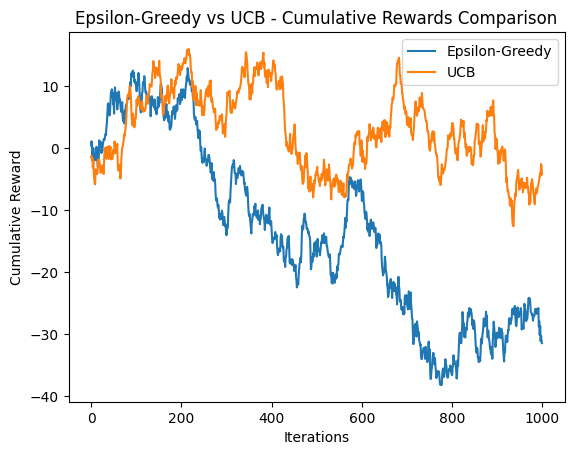

In [39]:
# Plotting cumulative rewards
plt.plot(np.cumsum(epsilon_rewards), label="Epsilon-Greedy")
plt.plot(np.cumsum(ucb_rewards), label="UCB")
plt.xlabel("Iterations")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.title("Epsilon-Greedy vs UCB - Cumulative Rewards Comparison")
plt.show()

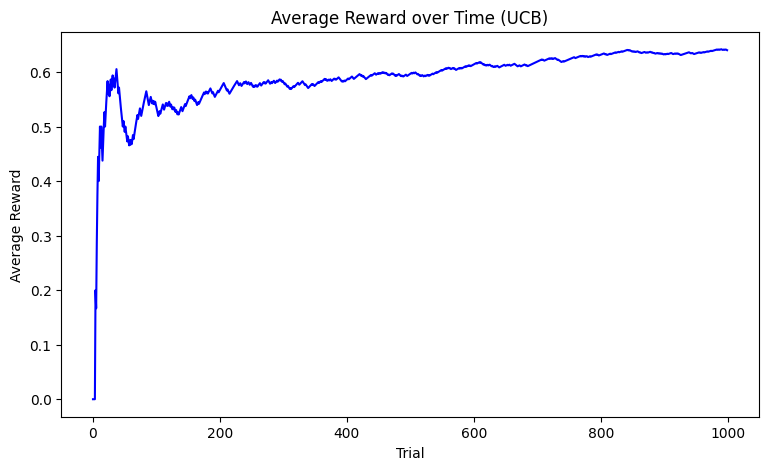

In [40]:
cumulative_rewards = np.cumsum(rewards)
average_rewards = cumulative_rewards / np.arange(1, num_trials + 1)
plt.figure(figsize=[9, 5])
plt.plot(average_rewards, color='blue')
plt.xlabel('Trial')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time (UCB)')
plt.show()